In [1]:
!pip install rasterio geopandas

In [2]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import calendar
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.mask import mask
import geopandas as gpd

In [3]:
#DEM paths
_2015_dem_path = '/Users/lindsaysummers/Documents/Research/DEMs/Wolverine/Wolverine_2015.08.13_DEM/Wolverine_2015.08.13_DEM.tif'
_2018_dem_path = '/Users/lindsaysummers/Documents/Research/DEMs/Wolverine/Wolverine_2018.09.12_DEM/Wolverine_2018.09.12_DEM.tif'
_2020_dem_path = '/Users/lindsaysummers/Documents/Research/DEMs/Wolverine/Wolverine_2020.05.02_DEM/Wolverine_2020.05.02_DEM.tif'

with rasterio.open(_2015_dem_path) as src:
        # Read the raster data as a NumPy array
        array_2015 = src.read(1)  # Reads the first band
with rasterio.open(_2018_dem_path) as src:
        # Read the raster data as a NumPy array
        array_2018 = src.read(1)
with rasterio.open(_2020_dem_path) as src:
        # Read the raster data as a NumPy array
        array_2020 = src.read(1)

In [4]:
#load in file to clip DEMs with
#box = gpd.read_file('/Users/lindsaysummers/Documents/Research/Cautorift/Inputs/Wolverine/Wolverine-2018-outline-UTM.shp')
box = gpd.read_file('/Users/lindsaysummers/Documents/Research/Velocity/Wolverine/RGI_data/Wolverine_Glacier_Boundaries.shp')
#box = gpd.read_file('/Users/lindsaysummers/Documents/Research/Cautorift/Inputs/Wolverine/Wolverine-2018-box-UTM.shp')

#make sure crs is the same
#if box.crs != src.crs:
#    box = box.to_crs(src.crs)

In [5]:
#resample function
def resample_dem(source_dem_path, target_dem_path, output_path):
    """Resamples a source DEM to match the resolution and bounds of a target DEM.

    Args:
        source_dem_path: Path to the DEM to be resampled.
        target_dem_path: Path to the DEM whose resolution will be matched.
        output_path: Path to save the resampled DEM.
    """
    with rasterio.open(source_dem_path) as src:
        with rasterio.open(target_dem_path) as target_src:
            
            # Define output profile based on target DEM
            output_profile = target_src.profile
            output_profile.update(dtype=src.dtypes[0], count = src.count) # Use original data type and bands

            with rasterio.open(output_path, 'w', **output_profile) as dst:
                reproject(
                    source=rasterio.band(src, list(range(1, src.count+1))),
                    destination=rasterio.band(dst, list(range(1, dst.count+1))),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=target_src.transform,
                    dst_crs=target_src.crs,
                    resampling=Resampling.bilinear # Choose appropriate resampling method
                )

In [6]:
#resample 2018
output_path_2018 = '/Users/lindsaysummers/Documents/Research/DEMs/Wolverine/Wolverine_2018.09.12_DEM/resampled_DEM_2018.tif'
clipped_2018 = resample_dem(_2018_dem_path, _2015_dem_path, output_path_2018)

In [7]:
#resample 2020
output_path_2020 = '/Users/lindsaysummers/Documents/Research/DEMs/Wolverine/Wolverine_2020.05.02_DEM/resampled_DEM_2020.tif'
clipped_2020 = resample_dem(_2020_dem_path, _2015_dem_path, output_path_2020)

In [8]:
#clip to outline
with rasterio.open(_2015_dem_path) as src_2015:
    clipped_2015, transform_2015 = mask(src_2015, box.geometry, crop=True)
with rasterio.open(output_path_2018) as src_2018:
    clipped_2018, transform_2018 = mask(src_2018, box.geometry, crop=True)
with rasterio.open(output_path_2020) as src_2020:
    clipped_2020, transform_2020 = mask(src_2020, box.geometry, crop=True)

clipped_2015 = clipped_2015.squeeze()
clipped_2018 = clipped_2018.squeeze()
clipped_2020 = clipped_2020.squeeze()

In [9]:
print(transform_2015)
print(transform_2018)
print(transform_2020)

| 0.50, 0.00, 392504.61|
| 0.00,-0.50, 6701455.86|
| 0.00, 0.00, 1.00|
| 0.50, 0.00, 392504.61|
| 0.00,-0.50, 6701455.86|
| 0.00, 0.00, 1.00|
| 0.50, 0.00, 392504.61|
| 0.00,-0.50, 6701455.86|
| 0.00, 0.00, 1.00|


In [10]:
#metadata for 2015
with rasterio.open(_2015_dem_path) as src:
  profile_2015 = src.profile # Get all metadata
  crs_2015 = src.crs           # Coordinate reference system
  transform_2015 = src.transform # Affine transformation matrix
  width_2015 = src.width         # Width in pixels
  height_2015 = src.height       # Height in pixels
  nodata_2015 = src.nodata       # No data value
  res_2015 = src.res

In [11]:
#metadata for 2018
with rasterio.open(output_path_2018) as src:
  profile_2018 = src.profile # Get all metadata
  crs_2018 = src.crs           # Coordinate reference system
  transform_2018 = src.transform # Affine transformation matrix
  width_2018 = src.width         # Width in pixels
  height_2018 = src.height       # Height in pixels
  nodata_2018 = src.nodata       # No data value
  res_2018 = src.res

In [12]:
#metadata for 2020
with rasterio.open(output_path_2020) as src:
  profile_2020 = src.profile # Get all metadata
  crs_2020 = src.crs           # Coordinate reference system
  transform_2020 = src.transform # Affine transformation matrix
  width_2020 = src.width         # Width in pixels
  height_2020 = src.height       # Height in pixels
  nodata_2020 = src.nodata       # No data value
  res_2020 = src.res

In [13]:
print(res_2015)
print(res_2018)
print(res_2020)

(0.5, 0.5)
(0.5, 0.5)
(0.5, 0.5)


In [14]:
#DEM paths
clipped_2015_path = '/Users/lindsaysummers/Documents/Research/DEMs/Wolverine/clipped_2015.tif'
clipped_2018_path = '/Users/lindsaysummers/Documents/Research/DEMs/Wolverine/clipped_2018.tif'
clipped_2020_path = '/Users/lindsaysummers/Documents/Research/DEMs/Wolverine/clipped_2020.tif'

with rasterio.open(clipped_2015_path) as src:
        # Read the raster data as a NumPy array
        array_2015 = src.read(1)  # Reads the first band
with rasterio.open(clipped_2018_path) as src:
        # Read the raster data as a NumPy array
        array_2018 = src.read(1)
with rasterio.open(clipped_2020_path) as src:
        # Read the raster data as a NumPy array
        array_2020 = src.read(1)

In [15]:
#replace nodata values with nans
clipped_2015 = np.where(clipped_2015 == -3.4028234663852886e+38, np.nan, clipped_2015)
clipped_2018 = np.where(clipped_2018 == -3.4028234663852886e+38, np.nan, clipped_2018)
clipped_2020 = np.where(clipped_2020 == -3.4028234663852886e+38, np.nan, clipped_2020)

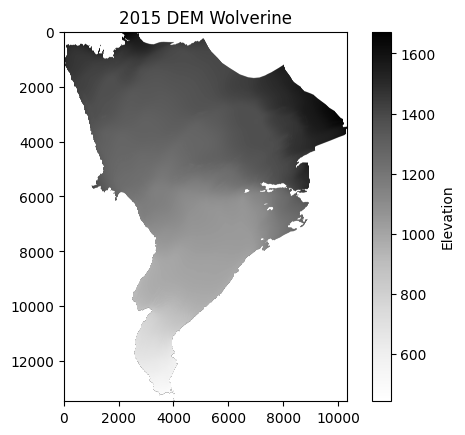

In [16]:
#plot clipped_2015
plt.imshow(clipped_2015, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2015 DEM Wolverine')

plt.show()

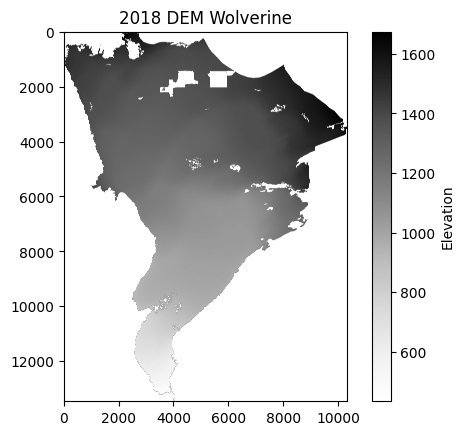

In [17]:
#plot clipped_2018
plt.imshow(clipped_2018, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2018 DEM Wolverine')

plt.show()

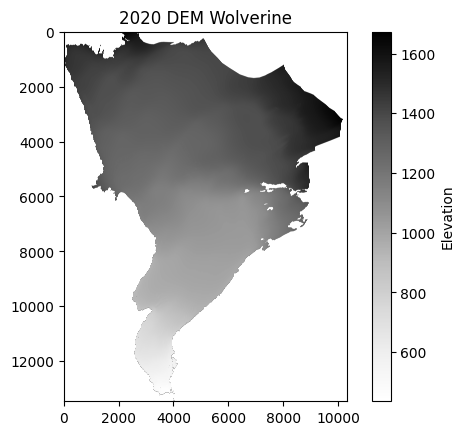

In [18]:
#plot clipped_2020
plt.imshow(clipped_2020, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2020 DEM Wolverine')

plt.show()

In [19]:
#make sure shapes are the same
print(clipped_2015.shape)
print(clipped_2018.shape)
print(clipped_2020.shape)

(13458, 10329)
(13458, 10329)
(13458, 10329)


In [20]:
#take the difference and divide to find yearly difference
diff_2015_2018 = clipped_2018 - clipped_2015
elevation_difference = diff_2015_2018 / 3
#elevation_difference = elevation_difference.squeeze()

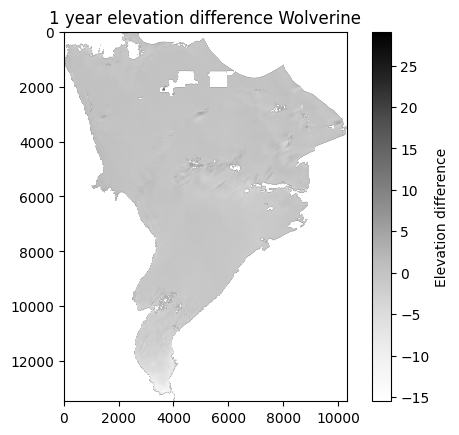

In [21]:
#plot
plt.imshow(elevation_difference, cmap='Greys')
plt.colorbar(label='Elevation difference')
plt.title('1 year elevation difference Wolverine')

plt.show()

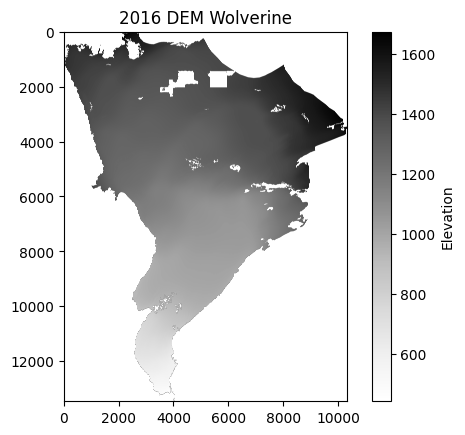

In [22]:
#2016 DEM

#2016 DEM = 2015 DEM + elevation_difference
array_2016 = clipped_2015 + elevation_difference

#plot
plt.imshow(array_2016, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2016 DEM Wolverine')

plt.show()

In [23]:
#export
output_path = '/Users/lindsaysummers/Documents/Research/DEMs/Wolverine/Wolverine_DEM_2016.tif'

with rasterio.open(clipped_2015_path) as src:
    profile = src.profile

profile.update({
    'dtype': rasterio.float32,  # Update data type if necessary
    'height': array_2016.shape[0],
    'width': array_2016.shape[1]
})

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(array_2016.astype(rasterio.float32), 1)

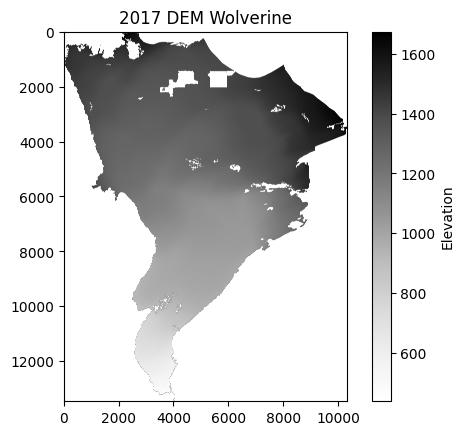

In [24]:
#2017 DEM

#2017 DEM = 2015 DEM + (elevation_difference * 2)
array_2017 = clipped_2015 + (elevation_difference * 2)

#plot
plt.imshow(array_2017, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2017 DEM Wolverine')

plt.show()

In [25]:
#export
output_path = '/Users/lindsaysummers/Documents/Research/DEMs/Wolverine/Wolverine_DEM_2017.tif'

with rasterio.open(clipped_2015_path) as src:
    profile = src.profile

profile.update({
    'dtype': rasterio.float32,  # Update data type if necessary
    'height': array_2017.shape[0],
    'width': array_2017.shape[1] # Use the transform from your clipped raster
})

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(array_2017.astype(rasterio.float32), 1)

In [26]:
#new elevation difference using 2018 and 2020
diff_2018_2020 = clipped_2020 - clipped_2018
elevation_difference = diff_2018_2020 / 2
#elevation_difference = elevation_difference.squeeze()

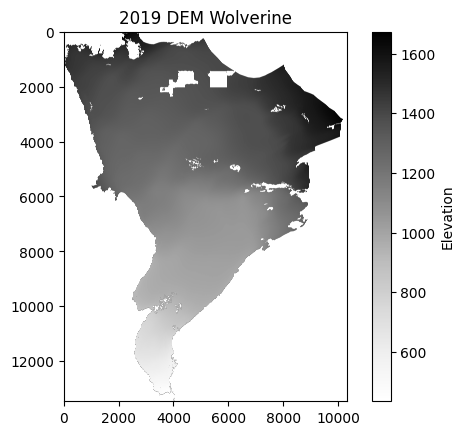

In [27]:
#2019 DEM

#2019 DEM = 2018 DEM + elevation_difference
array_2019 = clipped_2018 + elevation_difference

#plot
plt.imshow(array_2019, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2019 DEM Wolverine')

plt.show()

In [28]:
#export
output_path = '/Users/lindsaysummers/Documents/Research/DEMs/Wolverine/Wolverine_DEM_2019.tif'

with rasterio.open(clipped_2015_path) as src:
    profile = src.profile

profile.update({
    'dtype': rasterio.float32,  # Update data type if necessary
    'height': array_2019.shape[0],
    'width': array_2019.shape[1]  # Use the transform from your clipped raster
})

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(array_2019.astype(rasterio.float32), 1)

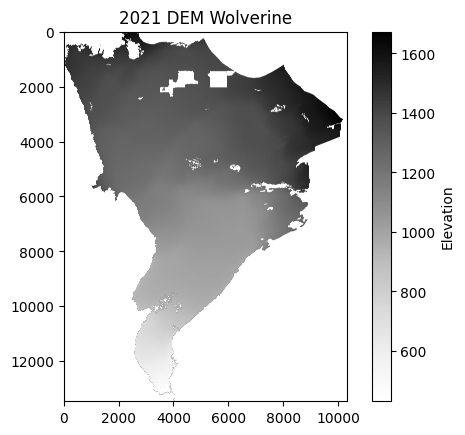

In [29]:
#2021 DEM

#2021 DEM = 2020 DEM + elevation_difference
array_2021 = clipped_2020 + elevation_difference

#plot
plt.imshow(array_2021, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2021 DEM Wolverine')

plt.show()

In [30]:
#export
output_path = '/Users/lindsaysummers/Documents/Research/DEMs/Wolverine/Wolverine_DEM_2021.tif'

with rasterio.open(clipped_2015_path) as src:
    profile = src.profile

profile.update({
    'dtype': rasterio.float32,  # Update data type if necessary
    'height': array_2021.shape[0],
    'width': array_2021.shape[1]
})

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(array_2021.astype(rasterio.float32), 1)

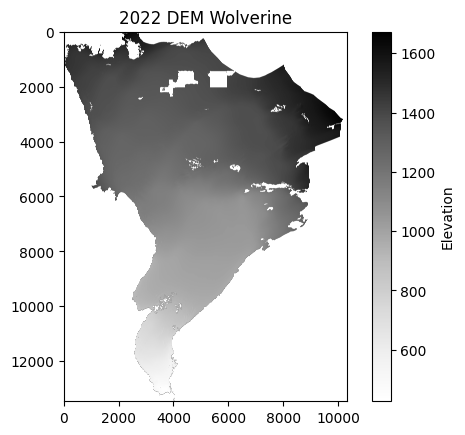

In [31]:
#2022 DEM

#2022 DEM = 2020 DEM + (elevation_difference * 2)
array_2022 = clipped_2020 + (elevation_difference * 2)

#plot
plt.imshow(array_2022, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2022 DEM Wolverine')

plt.show()

In [32]:
#export
output_path = '/Users/lindsaysummers/Documents/Research/DEMs/Wolverine/Wolverine_DEM_2022.tif'

with rasterio.open(clipped_2015_path) as src:
    profile = src.profile

profile.update({
    'dtype': rasterio.float32,  # Update data type if necessary
    'height': array_2022.shape[0],
    'width': array_2022.shape[1]
})

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(array_2022.astype(rasterio.float32), 1)

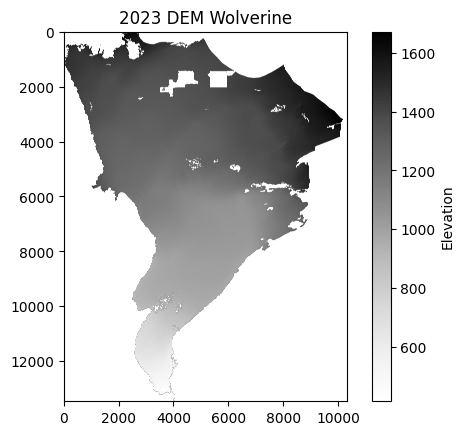

In [33]:
#2023 DEM

#2023 DEM = 2020 DEM + (elevation_difference * 3)
array_2023 = clipped_2020 + (elevation_difference * 3)

#plot
plt.imshow(array_2023, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2023 DEM Wolverine')

plt.show()

In [34]:
#export
output_path = '/Users/lindsaysummers/Documents/Research/DEMs/Wolverine/Wolverine_DEM_2023.tif'

with rasterio.open(clipped_2015_path) as src:
    profile = src.profile

profile.update({
    'dtype': rasterio.float32,  # Update data type if necessary
    'height': array_2023.shape[0],
    'width': array_2023.shape[1]
})

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(array_2023.astype(rasterio.float32), 1)

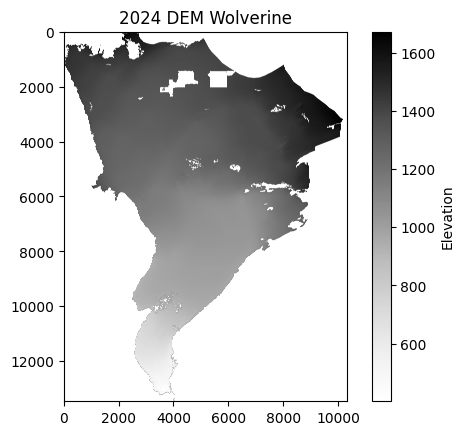

In [35]:
#2024 DEM

#2024 DEM = 2020 DEM + (elevation_difference * 4)
array_2024 = clipped_2020 + (elevation_difference * 4)

#plot
plt.imshow(array_2024, cmap='Greys')
plt.colorbar(label='Elevation')
plt.title('2024 DEM Wolverine')

plt.show()

In [36]:
#export
output_path = '/Users/lindsaysummers/Documents/Research/DEMs/Wolverine/Wolverine_DEM_2024.tif'

with rasterio.open(clipped_2015_path) as src:
    profile = src.profile

profile.update({
    'dtype': rasterio.float32,  # Update data type if necessary
    'height': array_2024.shape[0],
    'width': array_2024.shape[1]
})

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(array_2024.astype(rasterio.float32), 1)